# Fundamentals of Data Analytics
# Exercise Sheet 9: Dimensionality Reduction (PCA)

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll, make_blobs
from sklearn.decomposition import PCA
import pandas as pd

import plotly.express as px

%matplotlib inline
plt.style.use('seaborn-v0_8')

## Exercise 1: Implementing PCA from Scratch

In this exercise, you'll implement Principal Component Analysis (PCA) using NumPy. We'll provide the eigendecomposition part using NumPy's built-in functions, but you'll implement the rest of the algorithm yourself.

PCA steps:
1. Standardize the data
2. Compute the covariance matrix
3. Compute eigenvectors and eigenvalues
4. Select principal components
5. Project the data

First, let's create some sample data:

In [2]:
# Generate sample data
np.random.seed(42)
X, _ = make_blobs(n_samples=300, n_features=3, centers=4, cluster_std=2.0)

# Create a DataFrame for Plotly
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

# Plot the original 3D data using Plotly
fig = px.scatter_3d(df, x='X', y='Y', z='Z', title='Original 3D Data')
fig.update_traces(marker=dict(size=3))
fig.show()

### Task 1.1: Implement the PCA class

Complete the following PCA class implementation:

In [3]:
class MyPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # TODO: Implement the following steps:
        # 1. Center the data by subtracting the mean
        # 2. Compute the covariance matrix
        # 3. Compute eigenvalues and eigenvectors
        # 4. Sort eigenvectors by eigenvalues in descending order
        # 5. Store top n_components eigenvectors
        # 6. Compute explained variance ratio
        # Step 1: Center the data by subtracting the mean
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Compute the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Step 4: Sort eigenvectors by eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Step 5: Store top n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]

        # Step 6: Compute explained variance ratio
        total_variance = np.sum(eigenvalues)
        explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance



    def transform(self, X):
        # TODO: Implement the projection of X onto principal components
        # Project the data onto the principal components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)


    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

### Task 1.2: Compare your implementation with sklearn

Compare the results of your implementation with sklearn's PCA:

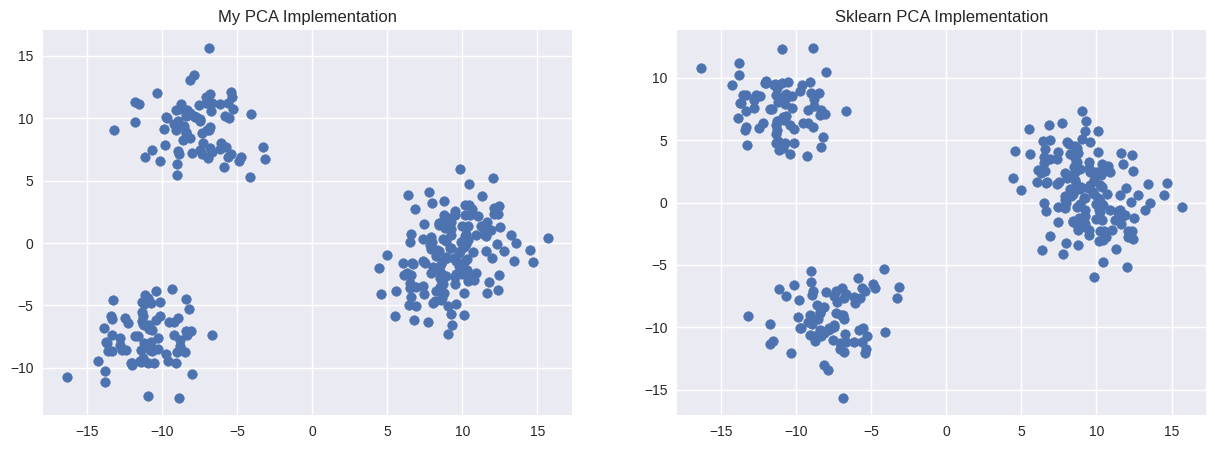

In [4]:
# Implement your comparison here
# 1. Apply your PCA implementation
my_pca = MyPCA(n_components=2)
X_reduced_my = my_pca.fit_transform(X)

# 2. Apply sklearn's PCA
sklearn_pca = PCA(n_components=2)
X_reduced_sklearn = sklearn_pca.fit_transform(X)

# 3. Plot and compare results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(X_reduced_my[:, 0], X_reduced_my[:, 1])
ax1.set_title('My PCA Implementation')

ax2.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1])
ax2.set_title('Sklearn PCA Implementation')

plt.show()